In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Postures.csv").drop(0)

In [3]:
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.3687480605765,67.9012603746826,-72.4446499648169,61.2754021959714,10.8411094568665,-69.2799064015993,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?


In [4]:
df.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2
count,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000
mean,2.983776,7.959229,50.346308,85.813150,-29.985096,49.595844,86.193751,-29.509579,48.612744,83.772387,-30.560906
std,1.421152,4.697754,32.695886,40.203448,34.361971,32.477961,40.452297,34.764460,33.605155,41.022710,35.120384
min,1.000000,0.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,-129.595296
25%,2.000000,5.000000,29.295141,63.497746,-56.356593,28.755679,64.156450,-57.360408,25.173405,58.053733,-58.654339
50%,3.000000,9.000000,54.620245,86.526334,-30.864248,54.215714,87.543493,-30.185331,53.814592,86.459935,-32.356535
75%,4.000000,12.000000,72.488833,113.108673,-1.419462,71.763080,116.228881,-0.368080,71.561988,106.661720,-0.946134
max,5.000000,14.000000,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,104.590879


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78095 entries, 1 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78095 non-null  int64  
 1   User    78095 non-null  int64  
 2   X0      78095 non-null  float64
 3   Y0      78095 non-null  float64
 4   Z0      78095 non-null  float64
 5   X1      78095 non-null  float64
 6   Y1      78095 non-null  float64
 7   Z1      78095 non-null  float64
 8   X2      78095 non-null  float64
 9   Y2      78095 non-null  float64
 10  Z2      78095 non-null  float64
 11  X3      78095 non-null  object 
 12  Y3      78095 non-null  object 
 13  Z3      78095 non-null  object 
 14  X4      78095 non-null  object 
 15  Y4      78095 non-null  object 
 16  Z4      78095 non-null  object 
 17  X5      78095 non-null  object 
 18  Y5      78095 non-null  object 
 19  Z5      78095 non-null  object 
 20  X6      78095 non-null  object 
 21  Y6      78095 non-null  object 
 22

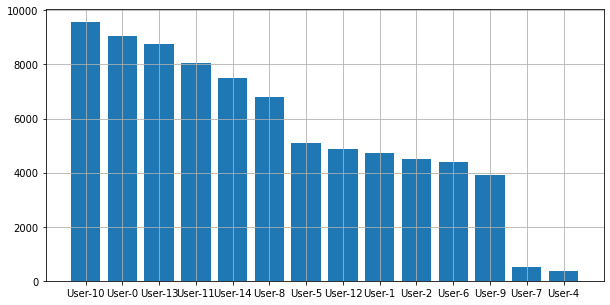

In [6]:
#Class distribution 
plt.figure(figsize=(10, 5))
plt.grid()
plt.bar(["User-" + str(int(user)) for user in df.value_counts('User').index], df.value_counts('User').values);

In [7]:
df.columns

Index(['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
       'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6',
       'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10',
       'Z10', 'X11', 'Y11', 'Z11'],
      dtype='object')

In [8]:
df = df.replace('?', np.nan)
df = df.astype(float)

In [9]:
for col in ['X0','Y0','Z0','X1','Y1','Z1','X2','Y2','Z2','X3','Y3','Z3','X4','Y4','Z4','X5','Y5','Z5','X6','Y6','Z6','X7','Y7','Z7','X8','Y8','Z8','X9','Y9','Z9','X10','Y10','Z10','X11','Y11','Z11']:
  df[col] = df[col].fillna(df[col].mean())

In [10]:
df1 = df.loc[df['User'] == 0.0].sample(frac = 1)
df2 = df.loc[df['User'] == 5.0].sample(frac = 1)
df3 = df.loc[df['User'] == 12.0].sample(frac = 1)

In [11]:
dfTrain = df.loc[df['User'] != 0.0].sample(frac = 1)
dfTrain = dfTrain.loc[df['User'] != 5.0].sample(frac = 1)
dfTrain = dfTrain.loc[df['User'] != 12.0].sample(frac = 1)
dfTeste = pd.concat([df1,df2,df3]).sample(frac = 1)

In [12]:
x_train = dfTrain.drop(columns = ['Class','User'])
y_train = dfTrain['Class']

In [13]:
x_test = dfTeste.drop(columns = ['Class','User'])
y_test = dfTeste['Class']

Normalizacao Z-Score

In [14]:
x_mean = x_train.mean()
x_std = x_train.std()
x_normZ = (x_train-x_mean)/x_std

In [15]:
x_testZ = (x_test-x_mean)/x_std

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix, accuracy_score

In [17]:
svm = SVC(C= 1,
          kernel='poly',            # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’       
          gamma='auto' ,           # se gamma='scale'(padrão) é passado, então ele usa 1 / (n_features * X.var ()) como valor de gama,
                                   # se 'auto', usa 1 / n_features.
          degree = 4,              # grau do polinomio para kernel poly
          coef0 = 2,               # usa em poly e sigmoid
          tol=0.01,                # Tolerância para critério de parada.
          shrinking = True,        # uso da heurística de encolhimento
          probability = False,      # usa 5-fold cross validation
          cache_size=2048,         # Especifique o tamanho do cache do kernel (em MB).
          verbose= False, 
          max_iter=-1,             # Limite rígido nas iterações no solver ou -1 para nenhum limite.
          )

svm.fit(x_normZ, y_train.values.ravel())

print("Treino\n")
predictions = svm.predict(x_normZ)
confMatSVM = confusion_matrix(y_train,predictions)
print(confMatSVM)
print(classification_report(y_train,predictions))

print("\n____________________________________________________\n")
print("\n Teste\n")
predictionsTestSvm = svm.predict(x_testZ)
confMatSVM = confusion_matrix(y_test,predictionsTestSvm)
print(confusion_matrix(y_test,predictionsTestSvm))
print(classification_report(y_test,predictionsTestSvm))


Treino

[[12847     0    14     0     0]
 [   25 11362     5     1     0]
 [   24     0 12455     1     0]
 [    4     2    52 10691     0]
 [    1     0     1     0 11592]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     12861
         2.0       1.00      1.00      1.00     11393
         3.0       0.99      1.00      1.00     12480
         4.0       1.00      0.99      1.00     10749
         5.0       1.00      1.00      1.00     11594

    accuracy                           1.00     59077
   macro avg       1.00      1.00      1.00     59077
weighted avg       1.00      1.00      1.00     59077


____________________________________________________


 Teste

[[3044  320   12    1   27]
 [  65 3104    0  287  129]
 [ 121   71 3641   29    2]
 [  33   79  995 2852   67]
 [ 199  575   59  287 3019]]
              precision    recall  f1-score   support

         1.0       0.88      0.89      0.89      3404
         2.0       0.75

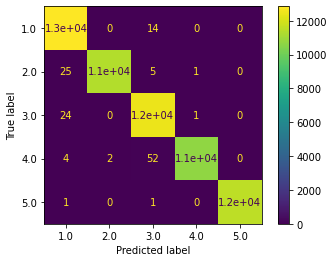

In [18]:
plot_confusion_matrix(svm, x_normZ, y_train);

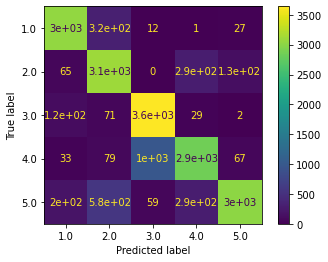

In [19]:
plot_confusion_matrix(svm, x_testZ, y_test);